In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
from sklearn.datasets import load_breast_cancer

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [4]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode("utf-8")), header=None)

In [7]:
auto.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
auto.columns = ['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [11]:
auto.shape

(205, 26)

In [12]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
auto = auto[["price", "horsepower", "width", "height"]]
auto.isin(["?"]).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [14]:
auto = auto.replace("?", np.nan).dropna()

In [15]:
auto.shape

(199, 4)

In [17]:
auto.dtypes

price          object
horsepower     object
width         float64
height        float64
dtype: object

In [20]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))

In [22]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [23]:
auto.dtypes

price           int64
horsepower      int64
width         float64
height        float64
dtype: object

In [24]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X = auto.drop("price", axis=1)
y = auto["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [28]:
len(X_train), len(X_test)

(99, 100)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.733, 0.737)

In [31]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
df = pd.read_csv(io.StringIO(res.decode("utf-8")), header=None)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
df.columns = ['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [36]:
df = df[["price", "length", "engine-size"]]

In [39]:
df = df.replace("?", np.nan).dropna()

In [42]:
df = df.assign(price=pd.to_numeric(df.price))

In [43]:
df.dtypes

price            int64
length         float64
engine-size      int64
dtype: object

In [44]:
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [45]:
len(X_train), len(X_test)

(100, 101)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.771, 0.763)

In [3]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [10]:
data.target.shape

(569,)

In [9]:
data.data.shape

(569, 30)

In [13]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
len(X_train), len(X_test)

(455, 114)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/hijiki/code-git-backup/Matsuo_book/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.952, 0.947)

In [17]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
X_train_std.shape

(455, 30)

In [20]:
X_test_std.shape

(114, 30)

In [21]:
model = LogisticRegression()
model.fit(X_train_std, y_train)

LogisticRegression()

In [24]:
model.score(X_train_std, y_train), model.score(X_test_std, y_test)

(0.989, 0.965)

In [38]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode("utf-8")), header=None)

In [39]:
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
auto.columns = ['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [41]:
auto = auto[["price", "length", "engine-size"]]
auto.isin(["?"]).sum()

price          4
length         0
engine-size    0
dtype: int64

In [42]:
auto = auto.replace("?", np.nan).dropna()

In [43]:
auto.shape

(201, 3)

In [44]:
auto.dtypes

price           object
length         float64
engine-size      int64
dtype: object

In [45]:
auto.head()

,price,length,engine-size
0,13495,168.8,130
1,16500,168.8,130
2,16500,171.2,152
3,13950,176.6,109
4,17450,176.6,136


In [46]:
auto = auto.assign(price=pd.to_numeric(auto.price))

In [47]:
X = auto.drop("price", axis=1)
y = auto["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [49]:
model.score(X_test, y_test)

0.765

In [5]:
cancer = sklearn.datasets.load_breast_cancer()

In [8]:
X = cancer.data
y = cancer.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
models = [DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=0),
         DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=0),
         DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0),
        ]

In [19]:
for model in models:
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9976525821596244 0.951048951048951
1.0 0.958041958041958
1.0 0.958041958041958


In [ ]:
# KNN
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

In [16]:
# 取得したデータをDataFrameオブジェクトとして読み込み
data = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
data.columns =['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

# 先頭5行を表示
data.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [21]:
y = data["classes"].map(lambda x: 1 if x=="p" else 0)

In [25]:
data = pd.get_dummies(data[["gill_color", "gill_attachment", "odor", "cap_color"]], dtype=int)
data.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
X = data

In [27]:
X

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
train_acc = []
test_acc = []

In [30]:
for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

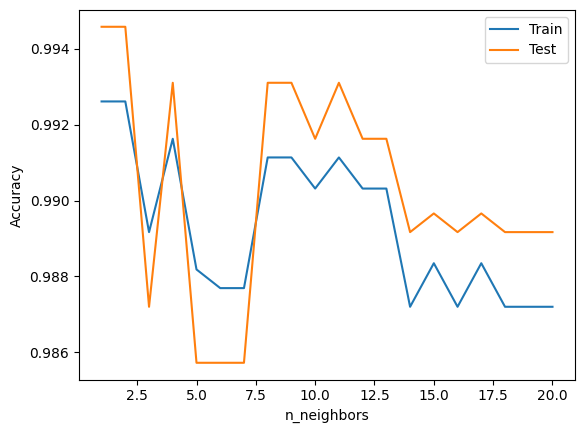

In [31]:
plt.plot(range(1, 21), train_acc, label="Train")
plt.plot(range(1, 21), test_acc, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [35]:
# 数学の成績データ
data = pd.read_csv("chap3/student-mat.csv", sep=";")

In [36]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
X = data.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                              ,'failures','famrel','freetime','goout','Dalc','Walc'
                              ,'absences','G1','G2']].values

In [39]:
X

array([[18,  4,  4, ...,  6,  5,  6],
       [17,  1,  1, ...,  4,  5,  5],
       [15,  1,  1, ..., 10,  7,  8],
       ...,
       [21,  1,  1, ...,  3, 10,  8],
       [18,  3,  2, ...,  0, 11, 12],
       [19,  1,  1, ...,  5,  8,  9]])

In [41]:
y = data["G3"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296, 14), (99, 14), (296,), (99,))

In [50]:
train_acc = []
test_acc = []

In [51]:
for n in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

In [54]:
len(train_acc), len(test_acc)

(20, 20)

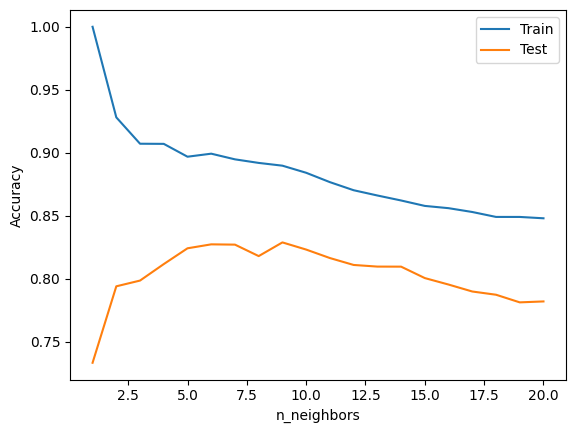

In [55]:
plt.plot(range(1, 21), train_acc, label="Train")
plt.plot(range(1, 21), test_acc, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [67]:
# SVM
cancer = load_breast_cancer()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,random_state=50
)

In [69]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [70]:
model = SVC(kernel="rbf", random_state=0, C=2)
model.fit(X_train_std, y_train)

SVC(C=2, random_state=0)

In [71]:
model.score(X_train_std, y_train), model.score(X_test_std, y_test)

(0.988, 0.986)